In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


# Seasonal decomposition of your time-series



This example demonstrates how we can use the ``decompose`` function to extract
the trend, seasonal, and random components of the time series and then
plot them all using the ``decomposed_plot`` function. We'll be plotting both
``additive`` and ``multiplicative`` examples of seasonality.


Automatically created module for IPython interactive environment


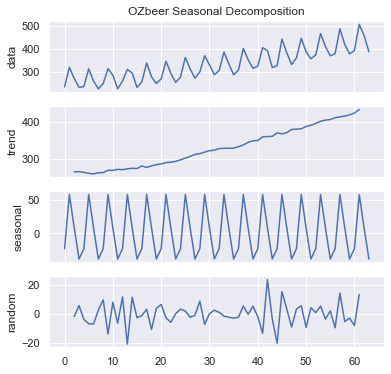

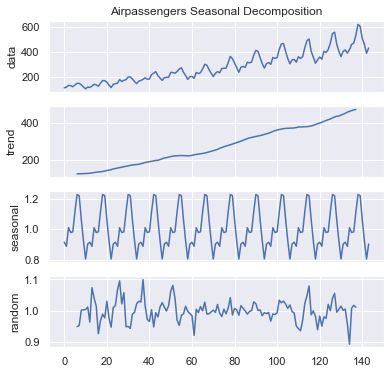

In [2]:
print(__doc__)

# Author: Charles Drotar <drotarcharles@gmail.com>

from pmdarima import arima
from pmdarima import datasets
from pmdarima import utils

# #############################################################################

# So what is happening when we call `decomposed`?
# 1) The trend is extracted from the signal via a convolution using either a
#    SMA or a user-defined filter.
# 2) We remove the effects of the trend from the original signal by either
#    subtracting its effects or dividing out its effects for `additive` or
#    'multiplicative' types of decompositions, respectively. We then take the
#    mean across all seasons to get the values for a single season. For m=4, we
#    expect 4 values for a single season.
# 3) We then create the seasonal series by replicating the single season
#    until it is the same length of the trend signal.
# 4) Lastly to get the random/noise elements of the signal we remove the effects
#    of both the trend and seasonal series and we are now left with the
#    variation of the original signal that is neither explainable by seasonal
#    nor trend effects.
#
# This logic produces a named tuple of the original signal, trend, seasonal,
# and random components. It is this named tuple that is passed to
# `decomposed_plot`

figure_kwargs = {'figsize': (6, 6)}  # set figure size for both examples

#
# ADDITIVE EXAMPLE : ausbeer
#

# Decompose the ausbeer dataset into trend, seasonal and random parts.
# We subset to a small window of the time series.

head_index = 17*4+2
tail_index = 17*4-4
first_index = head_index - tail_index
last_index = head_index
OZbeer = datasets.load_ausbeer()
timeserie_beer = OZbeer[first_index:last_index]
decomposed = arima.decompose(timeserie_beer, 'additive', m=4)

# Plot the decomposed signal of ausbeer as a subplot

axes = utils.decomposed_plot(decomposed, figure_kwargs=figure_kwargs,
                             show=False)
axes[0].set_title("OZbeer Seasonal Decomposition")


#
# MULTIPLICATIVE EXAMPLE: airpassengers
#

# Decompose the airpassengers dataset into trend, seasonal and random parts.
decomposed = arima.decompose(datasets.load_airpassengers(),
                             'multiplicative', m=12)

# Plot the decomposed signal of airpassengers as a subplot

axes = utils.decomposed_plot(decomposed, figure_kwargs=figure_kwargs,
                             show=False)
axes[0].set_title("Airpassengers Seasonal Decomposition");

**Alternatively, we can use the seasonal_decompose from statsmodels**

In [3]:
# Load data
OZbeer = pd.read_csv('OZBeer Data.csv',index_col='Month', 
                     parse_dates=True, low_memory=False)

Air_data = pd.read_csv('Airpassengers Data.csv',index_col='Month', 
                     parse_dates=True, low_memory=False)

In [4]:
OZbeer.head()

,Monthly beer production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9


In [5]:
Air_data.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<AxesSubplot:xlabel='Month'>

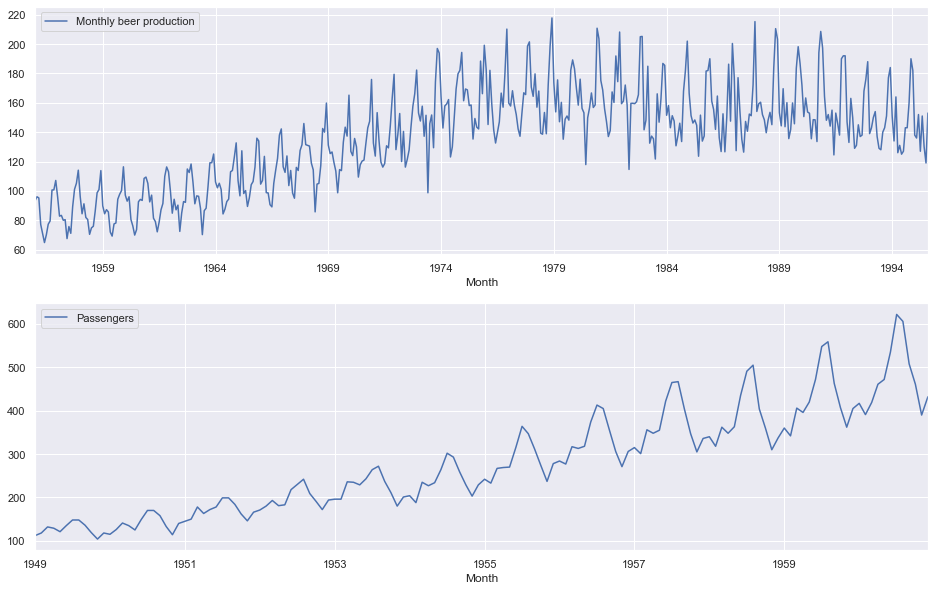

In [6]:
f, (ax1, ax2) = plt.subplots(2, figsize=(16, 10))

OZbeer.plot(ax=ax1)
Air_data.plot(ax=ax2)

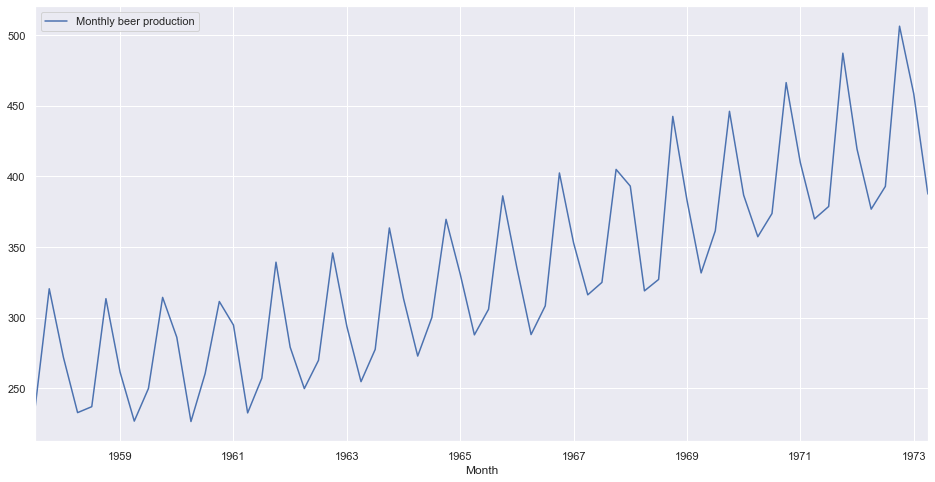

In [7]:
# Subsetting the OZbeer data
OZ_data = OZbeer.loc['1957-07':'1973-06']
# Resample quaterly data
OZ_data = OZ_data.resample('Q').sum()

# Plot resampled quaterly data
f, ax = plt.subplots(figsize=(16, 8))
OZ_data.plot(ax=ax);

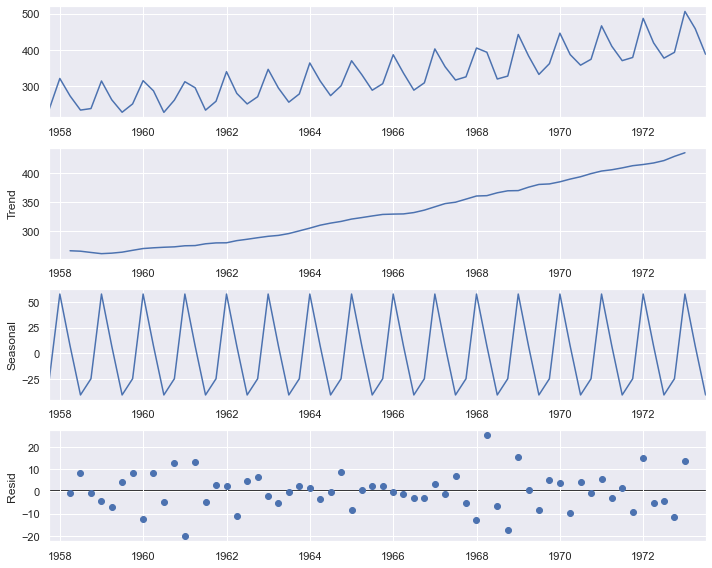

In [8]:
# Time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose OZ Beer Data
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8          
decompose_OZbeer = seasonal_decompose(OZ_data,model='additive') 
decompose_OZbeer.plot();

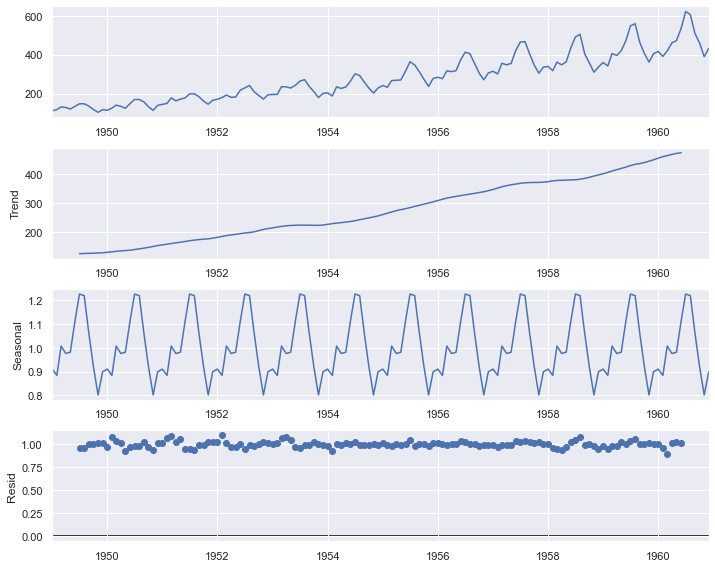

In [9]:
# Decompose AirPassengers Data
rcParams['figure.figsize'] = 10, 8           
decompose_Air = seasonal_decompose(Air_data,model='multiplicative') 
decompose_Air.plot();

## SARIMA

In [10]:
import pmdarima as pm
model = pm.auto_arima(Air_data, start_p=1, start_q=1, 
                      start_P=1, start_Q=1,
                      error_action='ignore',
                      trace=True,
                      seasonal=True, m=12)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=1022.299, Time=0.25 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.05 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.06 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.12 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=0.77 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.15 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.09 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=0.16 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=0.23 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.13 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.05 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=0.59 sec
 ARIMA(0,1,1)(1,1,1)[12]     

In [11]:
print(model.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                             Mon, 01 Mar 2021   AIC                           1019.178
Time:                                     22:29:20   BIC                           1030.679
Sample:                                          0   HQIC                          1023.851
                                             - 144                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      

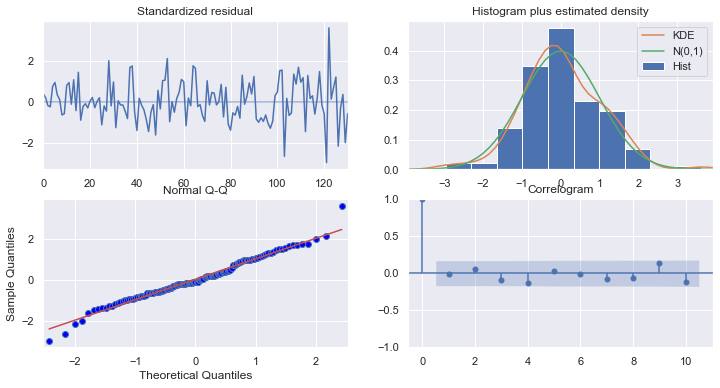

In [12]:
model.plot_diagnostics(figsize=(12, 6))
plt.show();

In [13]:
print(model.predict(n_periods=10))

[451.34707633 427.10222146 463.38248951 499.70577035 514.03552488
 571.85186695 661.31050797 648.08167448 551.28469066 501.06827881]


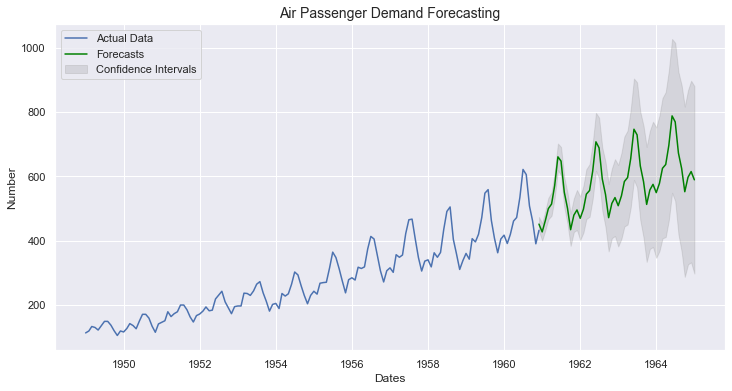

In [14]:
# predict next 50 periods forecasts with confidence interval
forecast, conf_int = model.predict(n_periods=50,return_conf_int=True)

# create index for next 50 periods
dates = pd.date_range(Air_data.index[-1], periods=50, freq='MS')

# Plot the forecasts
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(Air_data, label='Actual Data')
ax.plot(dates, forecast, color='green', label='Forecasts')
ax.set_title('Air Passenger Demand Forecasting',size=14)
ax.set_xlabel('Dates')
ax.set_ylabel('Number')

ax.fill_between(dates, conf_int[:, 0], conf_int[:, 1], 
                alpha=0.2, color='grey', 
                label="Confidence Intervals")

ax.legend(loc='upper left')
plt.show();

Once we get the best orders, we can re-run the SARIMA model with the SARIMAX implementation in statsmodels

In [15]:
import statsmodels.api as sm

mod = sm.tsa.statespace.SARIMAX(Air_data, order=(0,1,1), 
                                seasonal_order=(2,1,0,12),
                                simple_differencing=True)

res = mod.fit(disp=False)
print(res.summary())

                                      SARIMAX Results                                      
Dep. Variable:                   D.DS12.Passengers   No. Observations:                  131
Model:             SARIMAX(0, 0, 1)x(2, 0, [], 12)   Log Likelihood                -505.589
Date:                             Mon, 01 Mar 2021   AIC                           1019.178
Time:                                     22:29:21   BIC                           1030.679
Sample:                                 02-01-1950   HQIC                          1023.852
                                      - 12-01-1960                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      

D:\APP\CONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\APP\CONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
